- http://www.fec.gov/finance/disclosure/ftpdet.shtml#a2015_2016
- ftp://ftp.fec.gov/FEC/2016/indiv16.zip
- http://www.fec.gov/finance/disclosure/metadata/DataDictionaryContributionsbyIndividuals.shtml

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('ticks')

pd.options.display.max_rows = 10
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)

In [26]:
!mv /Users/tom.augspurger/Downloads/cm16.zip .
!mv /Users/tom.augspurger/Downloads/cn16.zip .

!unzip cm16.zip
!unzip cn16.zip 

Archive:  cm16.zip
  inflating: cm.txt                  
Archive:  cn16.zip
  inflating: cn.txt                  


In [340]:
!curl -O "ftp://ftp.fec.gov/FEC/2016/pas216.zip"
!unzip pas216.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  910k  100  910k    0     0   582k      0  0:00:01  0:00:01 --:--:--  582k
Archive:  pas216.zip
  inflating: itpas2.txt              


In [341]:
!curl -o cm_names.csv "http://www.fec.gov/finance/disclosure/metadata/cm_header_file.csv"
!curl -o cn_names.csv "http://www.fec.gov/finance/disclosure/metadata/cn_header_file.csv"
!curl -o in_names.csv "http://www.fec.gov/finance/disclosure/metadata/indiv_header_file.csv"
!curl -o cc_names.csv "http://www.fec.gov/finance/disclosure/metadata/pas2_header_file.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   158  100   158    0     0    962      0 --:--:-- --:--:-- --:--:--   963
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   180  100   180    0     0   1834      0 --:--:-- --:--:-- --:--:--  1836
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   204  100   204    0     0   1980      0 --:--:-- --:--:-- --:--:--  2000
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   212  100   212    0     0   2153      0 --:--:-- --:--:-- --:--:--  2163


In [342]:
in_names = pd.read_csv("in_names.csv").columns
cm_names = pd.read_csv("cm_names.csv").columns
cn_names = pd.read_csv("cn_names.csv").columns
cc_names = pd.read_csv("cc_names.csv").columns

# I/O

Pandas makes it easy to read from and write to a variety of formats.

In [107]:
[x for x in dir(pd) if x.startswith('read_')]

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_msgpack',
 'read_pickle',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table']

In [366]:
df = pd.read_csv('itcont.txt', sep='|', names=in_names, dtype={'ZIP_CODE': str})
cm = pd.read_csv('cm.txt', sep='|', names=cm_names)
cn = pd.read_csv('cn.txt', sep='|', names=cn_names)
cc = pd.read_csv("itpas2.txt", sep="|", names=cc_names)

`read_csv` has a ton of options...

In [108]:
pd.read_csv?

# The DataFrame

Most used object in pandas: an in memory table

In [113]:
df.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00004606,N,M4,P,15951124869,15,IND,"ARNOLD, ROBERT",MCPHERSON,KS,...,SELF,OPTOMETRIST,3102015,1000,NaN,SA11AI.20747,1002259,NaN,NaN,4041320151241796098
1,C00004606,N,M4,P,15951124869,15,IND,"BICKLE, DON",HAYS,KS,...,RETIRED,RETIRED,3302015,1000,NaN,SA11AI.20772,1002259,NaN,NaN,4041320151241796099
2,C00004606,N,M4,P,15951124869,15,IND,"ROSSMAN, RICHARD",OLATHE,KS,...,CRAWFORD SALES COMPANY,BUSINESSMAN,3302015,250,NaN,SA11AI.20759,1002259,NaN,NaN,4041320151241796100
3,C00452383,N,M4,P,15951124897,15,IND,"LLEWELLYN, CHARLES",FREDERICK,MD,...,NaN,NaN,3112015,500,NaN,SA11AI.25088,1002261,NaN,NaN,4041320151241796102
4,C00452383,N,M4,P,15951124897,15,IND,"TYNES, TIMOTHY MR.",VERO BEACH,FL,...,NaN,NaN,3022015,250,NaN,SA11AI.25074,1002261,NaN,NaN,4041320151241796103


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205519 entries, 0 to 205518
Data columns (total 21 columns):
CMTE_ID            205519 non-null object
AMNDT_IND          205519 non-null object
RPT_TP             205519 non-null object
TRANSACTION_PGI    205444 non-null object
IMAGE_NUM          205519 non-null int64
TRANSACTION_TP     205519 non-null object
ENTITY_TP          205365 non-null object
NAME               205510 non-null object
CITY               205373 non-null object
STATE              205151 non-null object
ZIP_CODE           204899 non-null object
EMPLOYER           165614 non-null object
OCCUPATION         171342 non-null object
TRANSACTION_DT     205518 non-null float64
TRANSACTION_AMT    205519 non-null int64
OTHER_ID           29908 non-null object
TRAN_ID            205507 non-null object
FILE_NUM           205519 non-null int64
MEMO_CD            5471 non-null object
MEMO_TEXT          48980 non-null object
SUB_ID             205519 non-null int64
dtypes: float6

Things to notice:

- tablular (like Excel)
- columnar (like Redshift)
- multiple dtypes (unlike NumPy)
- missing data handling (better than redshift)
- row-labels (unlike SQL)
- *Tons* of useful method (`df.<TAB>`)

We'll look a just a few of the methods, including aggregations, group-by, and merge.

# Joining tables

In [116]:
df.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00004606,N,M4,P,15951124869,15,IND,"ARNOLD, ROBERT",MCPHERSON,KS,...,SELF,OPTOMETRIST,3102015,1000,NaN,SA11AI.20747,1002259,NaN,NaN,4041320151241796098
1,C00004606,N,M4,P,15951124869,15,IND,"BICKLE, DON",HAYS,KS,...,RETIRED,RETIRED,3302015,1000,NaN,SA11AI.20772,1002259,NaN,NaN,4041320151241796099
2,C00004606,N,M4,P,15951124869,15,IND,"ROSSMAN, RICHARD",OLATHE,KS,...,CRAWFORD SALES COMPANY,BUSINESSMAN,3302015,250,NaN,SA11AI.20759,1002259,NaN,NaN,4041320151241796100
3,C00452383,N,M4,P,15951124897,15,IND,"LLEWELLYN, CHARLES",FREDERICK,MD,...,NaN,NaN,3112015,500,NaN,SA11AI.25088,1002261,NaN,NaN,4041320151241796102
4,C00452383,N,M4,P,15951124897,15,IND,"TYNES, TIMOTHY MR.",VERO BEACH,FL,...,NaN,NaN,3022015,250,NaN,SA11AI.25074,1002261,NaN,NaN,4041320151241796103


In [117]:
cm.head()

,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
0,C00000059,HALLMARK CARDS PAC,DEAN RODENBOUGH,2501 MCGEE,MD#288,KANSAS CITY,MO,64108,U,Q,UNK,M,C,NaN,NaN
1,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,"WALKER, KEVIN","25 MASSACHUSETTS AVE, NW",SUITE 600,WASHINGTON,DC,20001,B,Q,NaN,M,M,AMERICAN MEDICAL ASSOCIATION,NaN
2,C00000489,D R I V E POLITICAL FUND CHAPTER 886,TOM RITTER,3528 W RENO,NaN,OKLAHOMA CITY,OK,73107,U,N,NaN,Q,L,TEAMSTERS LOCAL UNION 886,NaN
3,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,"C. RICHARD BONEBRAKE, M.D.",623 SW 10TH AVE,NaN,TOPEKA,KS,66612,U,Q,UNK,Q,T,NaN,NaN
4,C00000638,INDIANA STATE MEDICAL ASSOCIATION POLITICAL AC...,"VIDYA KORA, M.D.","322 CANAL WALK, CANAL LEVEL",NaN,INDIANAPOLIS,IN,46202,U,Q,NaN,Q,M,NaN,NaN


Problem: Commitee names are not in the table we're interested in.

Solution: join `df` to `cm`.

Tools: slicing and `pd.merge`

In [119]:
# [] used for two things here
# inner: list of column names ['CMTE_ID', 'CMTE_NM']
# outter: sliceing (thru __getitem__) like x[0]

cm[['CMTE_ID', 'CMTE_NM']]

,CMTE_ID,CMTE_NM
0,C00000059,HALLMARK CARDS PAC
1,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...
2,C00000489,D R I V E POLITICAL FUND CHAPTER 886
3,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE
4,C00000638,INDIANA STATE MEDICAL ASSOCIATION POLITICAL AC...
...,...,...
12070,C90015363,LONG ISLAND LAW ENFORCEMENT FOUNDATION
12071,C90015371,ENVIRONMENT FLORIDA
12072,C90015389,DOUG MAGEE FOR CONGRESS COMMITTEE
12073,C99002396,AMERICAN POLITICAL ACTION COMMITTEE


In [170]:
df = pd.merge(df, cm[['CMTE_ID', 'CMTE_NM']])

In [127]:
with pd.option_context('display.max_rows', 20):
    print(df['CMTE_NM'].value_counts().head(20))

ACTBLUE                                                      18989
DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE                  17114
REPUBLICAN NATIONAL COMMITTEE                                 8877
DNC SERVICES CORPORATION/DEMOCRATIC NATIONAL COMMITTEE        7121
DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE                      6494
NRSC                                                          2919
EMILY'S LIST                                                  2885
NRCC                                                          2388
ERNST & YOUNG POLITICAL ACTION COMMITTEE                      2355
PRICEWATERHOUSECOOPERS POLITICAL ACTION COMMITTEE I           2209
CRUZ FOR PRESIDENT                                            1843
KAMALA HARRIS FOR SENATE                                      1469
OAKLAND COUNTY DEMOCRATIC PARTY                               1392
PORTMAN FOR SENATE COMMITTEE                                  1382
AMERICAN CRYSTAL SUGAR COMPANY POLITICAL ACTION COMMITTEE     

Talk about `Index`es

In [144]:
counts = df.CMTE_NM.value_counts()
counts[counts.index.str.contains('president', case=False)]

CRUZ FOR PRESIDENT                                          1843
MARCO RUBIO FOR PRESIDENT                                    232
HARLEY BROWN FOR PRESIDENT CAMPAIGN COMMITTEE                 17
KERRY BOWERS FOR PRESIDENT COMMITTEE                           9
COMMITTEE TO ELECT KARIN L SWANSON FOR PRESIDENT               2
SHOS MUSIC COMMITTEE TO ELECT SHO MUHAMMAD FOR PRESIDENT       2
MESPLAY FOR PRESIDENT                                          1
CHRISTOPHER HILL FOR PRESIDENT                                 1
WILLIE CARTER FOR PRESIDENT COMMITTEE                          1
dtype: int64

In [284]:
df.TRANSACTION_AMT.describe()

count    205519.000000
mean       1024.927004
std        4580.138090
min     -226800.000000
25%         250.000000
50%         384.000000
75%        1000.000000
max      716585.000000
Name: TRANSACTION_AMT, dtype: float64

In [291]:
df = df[df.TRANSACTION_AMT > 200 ]

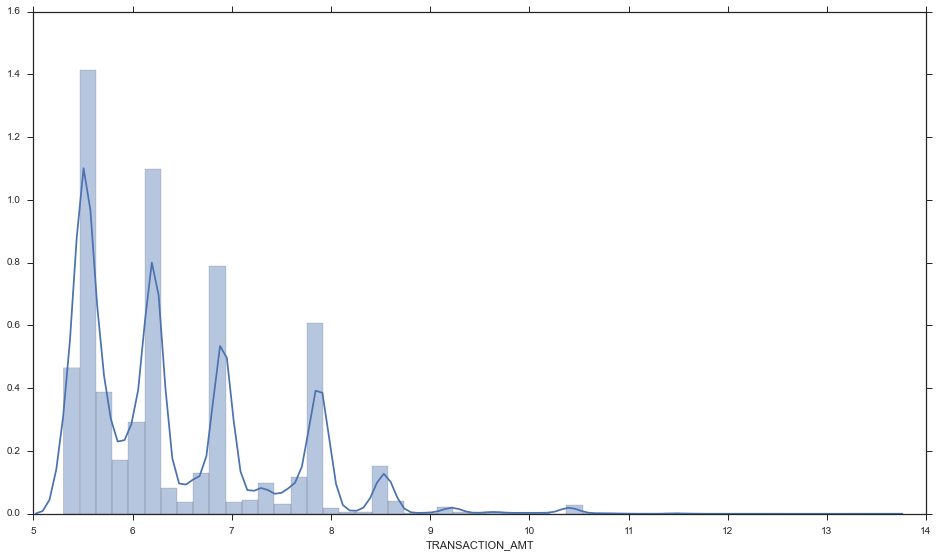

In [300]:
ax = sns.distplot(np.log(df.TRANSACTION_AMT))
# ax.set_xticklabels([np.exp(float(x)) for x in ax.get_xticklabels()])

In [313]:
raised = df.groupby("CMTE_NM").TRANSACTION_AMT.agg(['mean', 'count', 'sum'])

In [314]:
raised.sort('mean', ascending=False)

,mean,count,sum
CMTE_NM,,,
CARLY FOR CALIFORNIA INC,487410.000,1,487410
RENFROE FOR CONGRESS,252584.000,1,252584
COOPERATIVE OF AMERICAN PHYSICIANS IE COMMITTEE,167540.625,8,1340325
ELISABETH JENSEN FOR CONGRESS,98142.000,1,98142
NEW REPUBLICAN.ORG,80000.000,4,320000
...,...,...,...
DEERE & COMPANY PAC (AKA JOHN DEERE PAC),208.000,96,19968
PHILADELPHIA FEDERAL CREDIT UNION PAC (PFCU-PAC),206.000,1,206
EATON CORPORATION PUBLIC POLICY ASSOCIATION,206.000,6,1236


In [315]:
raised.sort('count', ascending=False)

,mean,count,sum
CMTE_NM,,,
ACTBLUE,995.304199,9359,9315052
REPUBLICAN NATIONAL COMMITTEE,2158.789380,7891,17035007
DNC SERVICES CORPORATION/DEMOCRATIC NATIONAL COMMITTEE,1250.323990,6065,7583215
DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,1445.491882,4188,6053720
DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,1906.126665,3979,7584478
...,...,...,...
FRIENDS OF RENTERIA,1000.000000,1,1000
FRIENDS OF RICH NUGENT,250.000000,1,250
SECURE PAC,5000.000000,1,5000


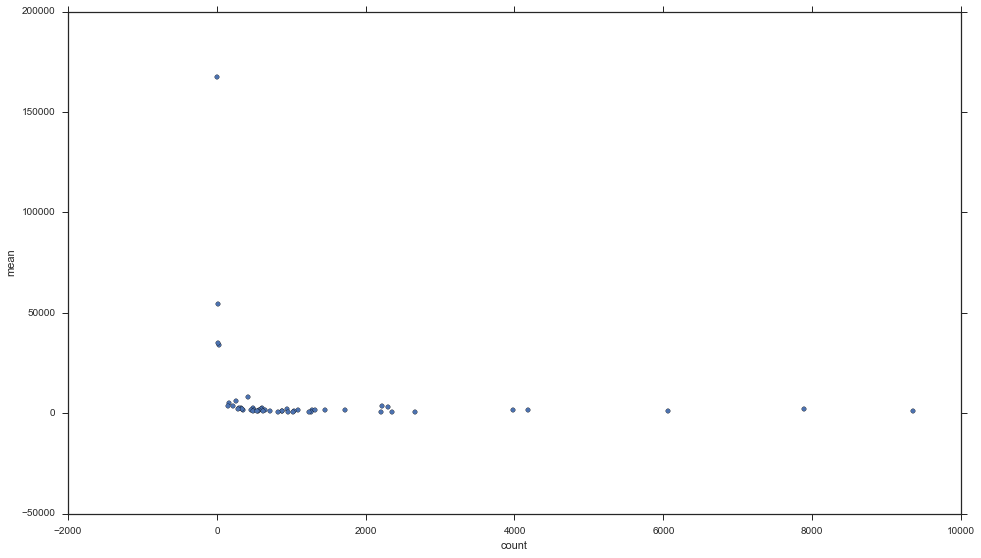

In [319]:
raised.sort('sum', ascending=False).head(50).plot(kind='scatter', x='count', y='mean')

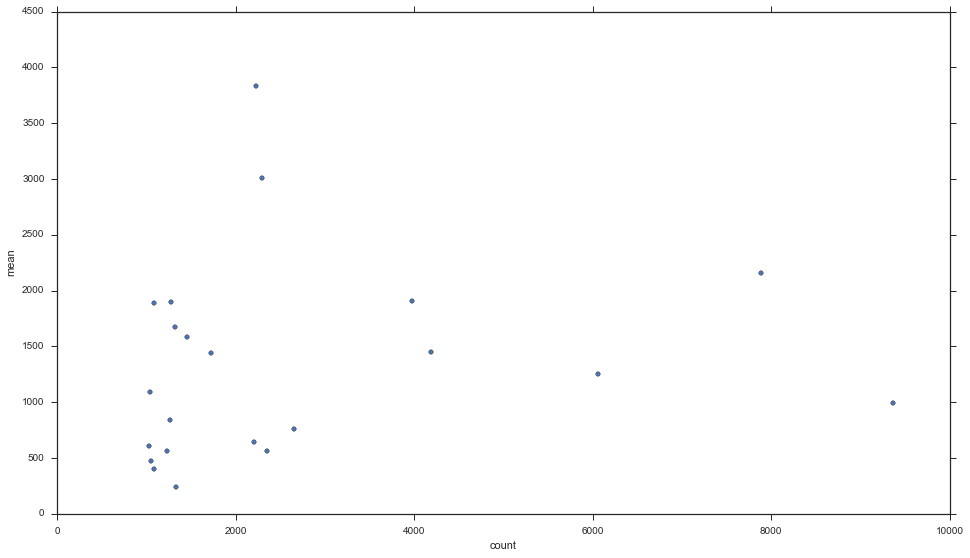

In [324]:
raised[raised['count'] > 1000].plot(kind='scatter', x='count', y='mean')

In [328]:
df.AMNDT_IND.value_counts()

N    155278
A     15517
T        99
dtype: int64

In [290]:
df.loc[df.TRANSACTION_AMT.idxmin()]

CMTE_ID                              C00508804
AMNDT_IND                                    N
RPT_TP                                      Q1
TRANSACTION_PGI                              P
IMAGE_NUM                          15951163773
                              ...             
MEMO_CD                                      X
MEMO_TEXT                                  NaN
SUB_ID                     4041720151242009788
CMTE_NM            KYRSTEN SINEMA FOR CONGRESS
date                       2015-01-15 00:02:00
Name: 2855, dtype: object

In [289]:
df.TRANSACTION_AMT.describe()

count    196266.000000
mean       1098.383638
std        4628.231211
min           1.000000
25%         250.000000
50%         416.000000
75%        1000.000000
max      716585.000000
Name: TRANSACTION_AMT, dtype: float64

In [362]:
cm[['CMTE_ID', "CMTE_NM"]].CMTE_ID.value_counts()

C00576769    2
C00213645    1
C90009846    1
C00574962    1
C00555227    1
            ..
C00503581    1
C00545004    1
C00283135    1
C00370643    1
C00473025    1
dtype: int64

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205519 entries, 0 to 205518
Data columns (total 21 columns):
CMTE_ID            205519 non-null object
AMNDT_IND          205519 non-null object
RPT_TP             205519 non-null object
TRANSACTION_PGI    205444 non-null object
IMAGE_NUM          205519 non-null int64
TRANSACTION_TP     205519 non-null object
ENTITY_TP          205365 non-null object
NAME               205510 non-null object
CITY               205373 non-null object
STATE              205151 non-null object
ZIP_CODE           204899 non-null object
EMPLOYER           165614 non-null object
OCCUPATION         171342 non-null object
TRANSACTION_DT     205518 non-null float64
TRANSACTION_AMT    205519 non-null int64
OTHER_ID           29908 non-null object
TRAN_ID            205507 non-null object
FILE_NUM           205519 non-null int64
MEMO_CD            5471 non-null object
MEMO_TEXT          48980 non-null object
SUB_ID             205519 non-null int64
dtypes: float6

In [ ]:
pd.merge(cn)

In [371]:
cn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 3960
Data columns (total 15 columns):
CAND_ID                 3961 non-null object
CAND_NAME               3960 non-null object
CAND_PTY_AFFILIATION    3956 non-null object
CAND_ELECTION_YR        3961 non-null int64
CAND_OFFICE_ST          3961 non-null object
CAND_OFFICE             3961 non-null object
CAND_OFFICE_DISTRICT    3949 non-null float64
CAND_ICI                3875 non-null object
CAND_STATUS             3956 non-null object
CAND_PCC                3696 non-null object
CAND_ST1                3868 non-null object
CAND_ST2                125 non-null object
CAND_CITY               3957 non-null object
CAND_ST                 3896 non-null object
CAND_ZIP                3866 non-null float64
dtypes: float64(2), int64(1), object(12)
memory usage: 495.1+ KB


In [415]:
cn.CAND_ST

0       AK
1       AL
2       AL
3       AL
4       AL
        ..
3956    VT
3957    WA
3958    WA
3959    WI
3960    WI
Name: CAND_ST, dtype: object

In [418]:
don = pd.merge(cc, cn[['CAND_ID', 'CAND_NAME', 'CAND_PTY_AFFILIATION', 'CAND_OFFICE', 'CAND_ST']])
don = don[['TRANSACTION_PGI', 'ENTITY_TP', 'NAME', 'EMPLOYER', 'OCCUPATION',
           'TRANSACTION_DT', 'TRANSACTION_AMT', 'CAND_NAME', 'CAND_PTY_AFFILIATION',
           'CAND_OFFICE', 'CAND_ST']]
don.head()

,TRANSACTION_PGI,ENTITY_TP,NAME,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,CAND_NAME,CAND_PTY_AFFILIATION,CAND_OFFICE,CAND_ST
0,P,COM,ADAM SCHIFF FOR CONGRESS,NaN,NaN,3062015,1000,"SCHIFF, ADAM",DEM,H,CA
1,P,ORG,SCHIFF FOR CONGRESS,NaN,NaN,3102015,1000,"SCHIFF, ADAM",DEM,H,CA
2,P,CCM,SCHIFF FOR CONGRESS,NaN,NaN,2202015,1000,"SCHIFF, ADAM",DEM,H,CA
3,P,CCM,SCHIFF FOR CONGRESS,NaN,NaN,2232015,1000,"SCHIFF, ADAM",DEM,H,CA
4,P,CCM,SCHIFF FOR CONGRESS,NaN,NaN,2252015,1000,"SCHIFF, ADAM",DEM,H,CA


In [385]:
don.CAND_PTY_AFFILIATION.unique()

array(['DEM', 'REP', 'DFL', 'UNK', 'IND', 'LIB'], dtype=object)

In [386]:
don.CAND_PTY_AFFILIATION.value_counts()

REP    15291
DEM     8213
UNK      111
DFL      101
IND       16
LIB        2
dtype: int64

In [387]:
don.NAME.value_counts()

FRIENDS OF PAT TOOMEY                              232
FRIENDS OF SCHUMER                                 221
TIM SCOTT FOR SENATE                               188
FRIENDS OF ROY BLUNT                               187
PORTMAN FOR SENATE COMMITTEE                       180
                                                  ... 
RELY ON YOUR BELIEFS POLITICAL ACTION COMMITTEE      1
HOEVEN FOR U.S. SENATE                               1
JOHN HARDY ISAKSON                                   1
RICHARD NEAL FOR HOUSE                               1
LOFGREN FOR CONGRESS/C00289603                       1
dtype: int64

In [510]:
x = don.groupby(['CAND_PTY_AFFILIATION', 'CAND_ST']).TRANSACTION_AMT.sum().unstack('CAND_PTY_AFFILIATION')[['DEM', 'REP']]
x = x.fillna(0)
x[x<=0] = 0

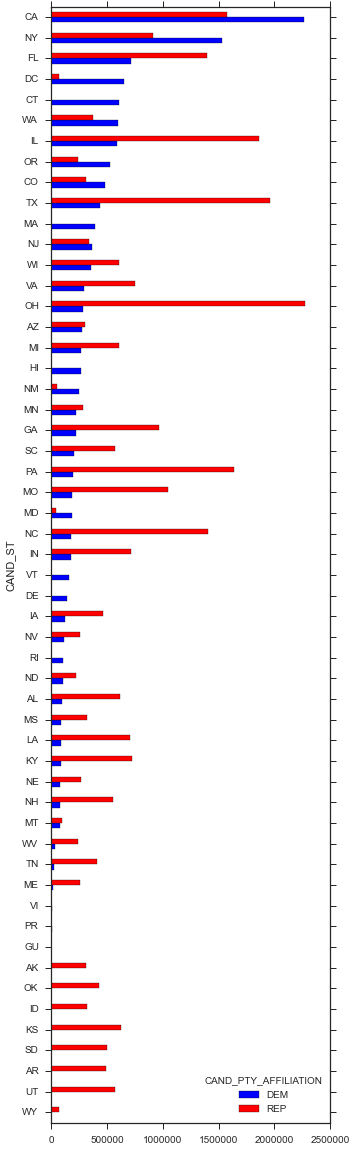

In [514]:
x.sort('DEM').plot(kind='barh', figsize=(5, 20), color=['blue', 'red'])

In [515]:
# random

In [525]:
query = """
select distinct * from image natural join parsed
where dt > TIMESTAMP "2015-05-05T21:00:00"
  and parser in ('roving', 'template')
order by dt desc;
"""

from ocr.server import make_engine

engine = make_engine.make_engine(kind='rds', db='taugspurger')
parsed = pd.read_sql_query(query, engine)

In [536]:
price = parsed.set_index(['parser', 'fuel_type', 'dt']).price.sort_index()
price = price.groupby(level=[0, 1, 2]).first()  # dedupe 6 values

In [537]:
price.index.is_unique

True

In [550]:
x = price.unstack('parser').dropna()
(x.roving != x.template).any()

False

In [394]:
with pd.option_context('display.max_rows', 20):
    print(don.groupby("NAME")
             .CAND_PTY_AFFILIATION
             .nunique()
             .order(ascending=False)
             .head(20))

NAME
SUSAN GAGE CATERERS                            3
CHAMBERS LOPEZ STRATEGIES                      2
DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE    2
WILLARD HOTEL                                  2
MENUS                                          2
RODNEY DAVIS FOR CONGRESS                      2
IAO PROPERTY HOLDINGS LLC                      2
UNITED PARCEL SERVICE INC.                     2
AMERICAN INSTITUTE OF CPAS                     2
WASHINGTON NATIONALS                           2
CLUB FOR GROWTH                                2
VAN SCOYOC ASSOCIATES, INC.                    2
VAN SCOYOC ASSOCIATES, INC. PAC                2
HONEYWELL INTERNATIONAL                        2
SCHNEIDER'S OF CAPITOL HILL                    2
AUERBACH, LEOR                                 2
DONOVAN FOR CONGRESS                           2
FINANCIAL INNOVATIONS                          2
CITIZENS FOR BOYLE                             2
RON JOHNSON FOR SENATE                         2
Name: CAND_PTY_

In [404]:
don.query('NAME == "DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE" & CAND_PTY_AFFILIATION != "DEM"')

,TRANSACTION_PGI,ENTITY_TP,NAME,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,CAND_NAME,CAND_PTY_AFFILIATION,CAND_OFFICE
6624,P,PTY,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,NaN,NaN,3252015,483,"NOLAN, RICHARD M.",DFL,H


In [408]:
ratio = (don.groupby(['NAME', 'CAND_PTY_AFFILIATION']).TRANSACTION_AMT.sum()
            .groupby(level='NAME').transform(lambda x: x / x.sum()))
ratio.order()

NAME                                   CAND_PTY_AFFILIATION
JASON SMITH FOR CONGRESS               REP                     0.007055
SUSAN GAGE CATERERS                    UNK                     0.020505
HONEYWELL INTERNATIONAL                UNK                     0.023810
CLUB FOR GROWTH                        DEM                     0.028845
DONOVAN FOR CONGRESS                   DEM                     0.031024
                                                                 ...   
DEBBIE WASSERMAN SCHULTZ FOR CONGRESS  DEM                          NaN
ERNST VICTORY                          REP                          NaN
FRELINGHUYSEN, RODNEY P. REP.          REP                          NaN
FRIENDS OF JARED POLIS COMMITTEE       DEM                          NaN
RUDY HOBBS FOR CONGRESS                DEM                          NaN
Name: TRANSACTION_AMT, dtype: float64

In [412]:
ratio.order().xs('JASON SMITH FOR CONGRESS')

CAND_PTY_AFFILIATION
REP    0.007055
UNK    0.992945
Name: TRANSACTION_AMT, dtype: float64

In [380]:
don['CAND_PTY_AFFILIATION'] = don['CAND_PTY_AFFILIATION'].astype('category')
don['NAME']

In [ ]:
don.groupby('CAND_PTY_AFFILIATION')

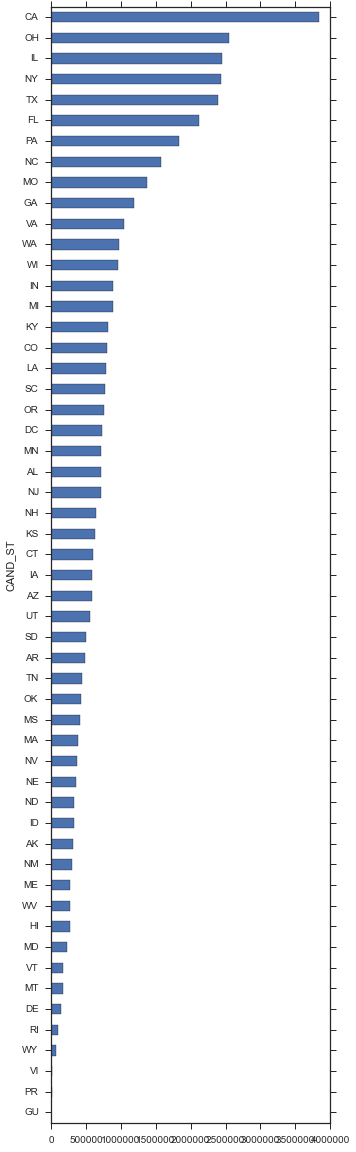

In [430]:
don.groupby("CAND_ST").TRANSACTION_AMT.sum().order().plot(kind='barh', figsize=(5, 20))

In [438]:
import statsmodels.api as sm

In [469]:
str(dta.YEAR.min())

'1700.0'

In [472]:
dta = sm.datasets.sunspots.load_pandas().data
dta['YEAR'] = dta.YEAR.astype(int)
dta.index = pd.date_range(start=str(dta.YEAR.min()), end=str(dta.YEAR.max()), freq='AS')
dta = dta.drop('YEAR', axis=1)

NonGuiException: 

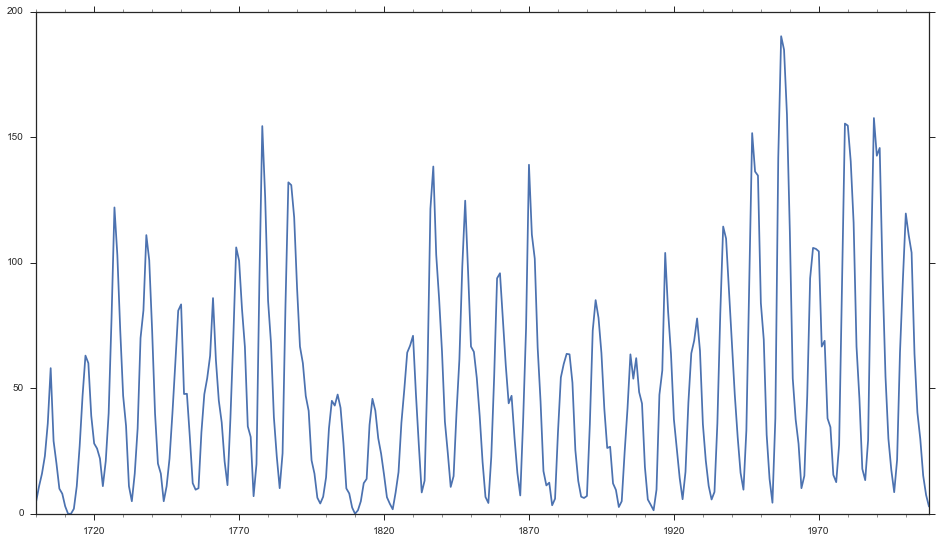

In [479]:
_ = dta.plot();

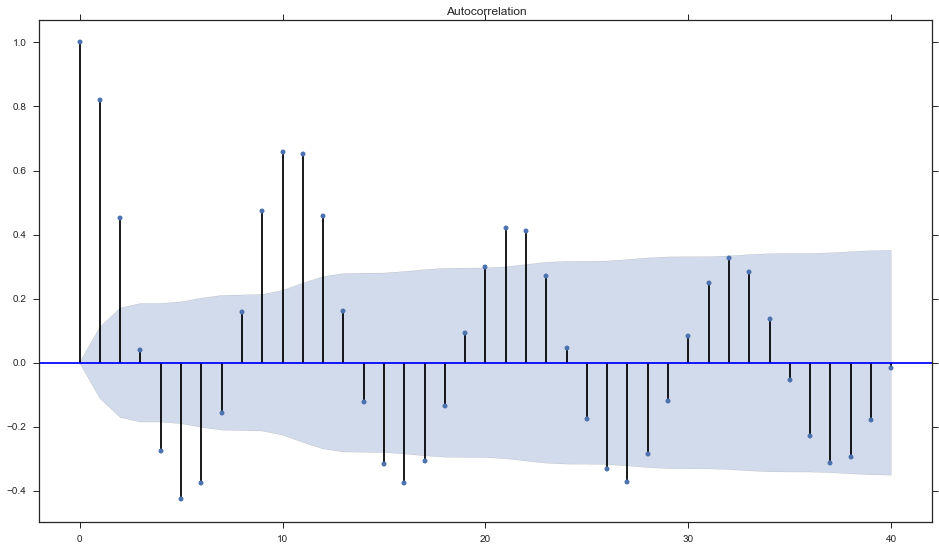

In [481]:
fig, ax = plt.subplots()
fig = sm.graphics.tsa.plot_acf(dta.SUNACTIVITY, lags=40, ax=ax)



In [482]:
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit()


In [183]:
df.TRANSACTION_DT.astype(str).order()

58627     10012014.0
58628     10012014.0
58632     10012014.0
58631     10012014.0
58629     10012014.0
             ...    
205017     8152014.0
205018     8152014.0
148728     9032014.0
30018      9162014.0
199906           nan
Name: TRANSACTION_DT, dtype: object

In [204]:
df['TRANSACTION_DT'] = df.TRANSACTION_DT.astype(str).str.rstrip('.0')

In [245]:
s = df.TRANSACTION_DT.copy()

In [246]:
s[s.str.len() == 7] =  s[(s.str.len() == 7)].str.pad(8, fillchar='0')

In [250]:
df['date'] = pd.to_datetime(s, format='%M%d%Y')

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205519 entries, 0 to 205518
Data columns (total 23 columns):
CMTE_ID            205519 non-null object
AMNDT_IND          205519 non-null object
RPT_TP             205519 non-null object
TRANSACTION_PGI    205444 non-null object
IMAGE_NUM          205519 non-null int64
TRANSACTION_TP     205519 non-null object
ENTITY_TP          205365 non-null object
NAME               205510 non-null object
CITY               205373 non-null object
STATE              205151 non-null object
ZIP_CODE           204899 non-null object
EMPLOYER           165614 non-null object
OCCUPATION         171342 non-null object
TRANSACTION_DT     205519 non-null object
TRANSACTION_AMT    205519 non-null int64
OTHER_ID           29908 non-null object
TRAN_ID            205507 non-null object
FILE_NUM           205519 non-null int64
MEMO_CD            5471 non-null object
MEMO_TEXT          48980 non-null object
SUB_ID             205519 non-null int64
CMTE_NM        

In [254]:
gr = df.groupby("date")
gr

In [261]:
# select avg(TRANSACTION_AMT) GROUP BY TRANSACTION_DT
amt = gr.TRANSACTION_AMT.mean().sort_index()

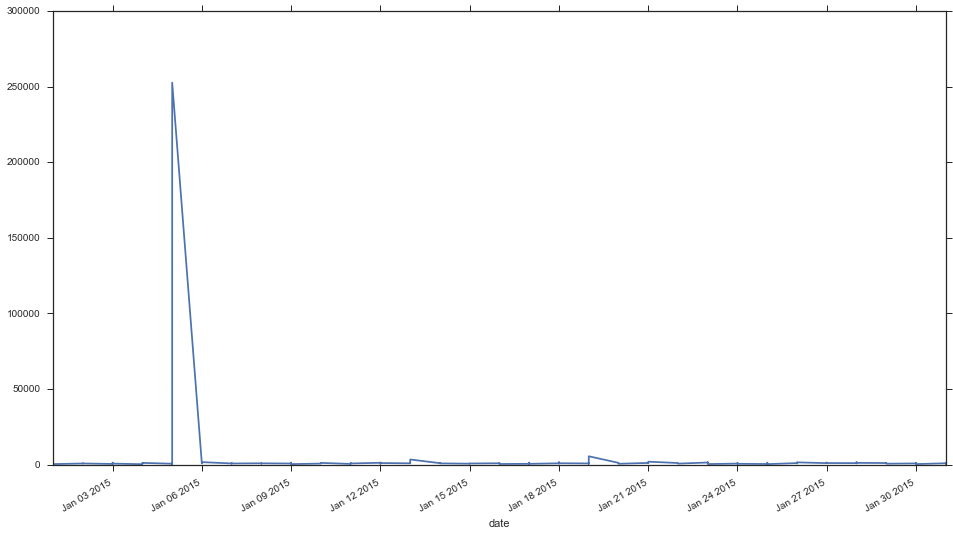

In [265]:
amt.loc['2015':].plot()

In [270]:
df.TRANSACTION_AMT.describe()

count    205519.000000
mean       1024.927004
std        4580.138090
min     -226800.000000
25%         250.000000
50%         384.000000
75%        1000.000000
max      716585.000000
Name: TRANSACTION_AMT, dtype: float64

In [277]:
with pd.option_context('display.max_rows', 50):
    print(df.loc[df.TRANSACTION_AMT.idxmin()])

CMTE_ID                                      C00075820
AMNDT_IND                                            N
RPT_TP                                              M5
TRANSACTION_PGI                                      P
IMAGE_NUM                                  15951424351
TRANSACTION_TP                                      15
ENTITY_TP                                          IND
NAME                            ADELSON, MIRIAM O. DR.
CITY                                         LAS VEGAS
STATE                                               NV
ZIP_CODE                                  8.910989e+08
EMPLOYER                           ADELSON DRUG CLINIC
OCCUPATION                                   PHYSICIAN
TRANSACTION_DT                                04092015
TRANSACTION_AMT                                -226800
OTHER_ID                                           NaN
TRAN_ID                                  SA11.15889243
FILE_NUM                                       1008869
MEMO_CD   

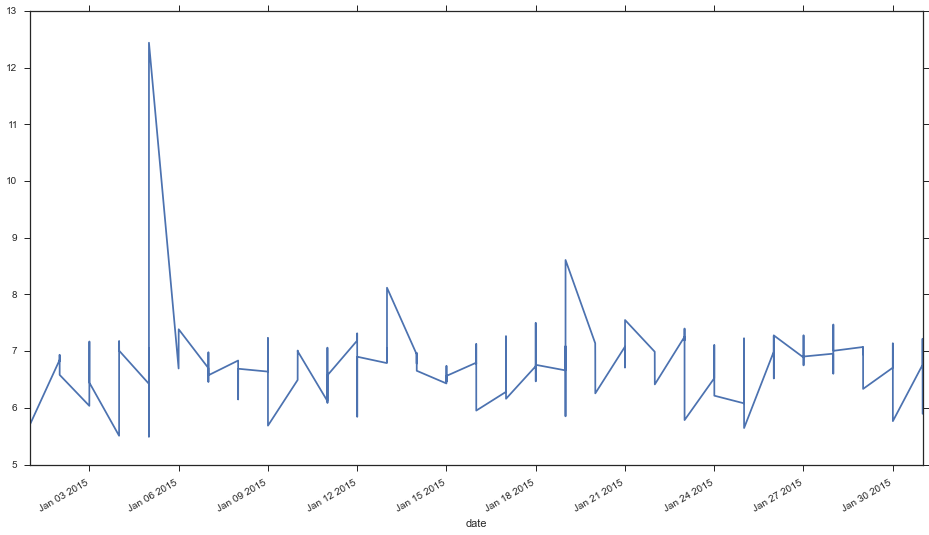

In [282]:
(df.query('TRANSACTION_AMT > 0')
   .groupby('date')
   .TRANSACTION_AMT
   .mean()
   .loc['2015':]
   .pipe(np.log)
   .plot())

Get commitee affiliation

In [150]:
cn[['CAND_ID', 'CAND_PTY']]

KeyError: "['CAND_PTY'] not in index"

In [ ]:
df = pd.

In [99]:
df.CMTE_NM = df.CMTE_NM.astype('category')

In [103]:
df["CMTE_NM"].value_counts()

ACTBLUE                                                      18989
DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE                  17114
REPUBLICAN NATIONAL COMMITTEE                                 8877
DNC SERVICES CORPORATION/DEMOCRATIC NATIONAL COMMITTEE        7121
DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE                      6494
                                                             ...  
RIGHT TO LIFE/OREGON PAC                                         1
LIBERTARIAN NATIONAL CONGRESSIONAL COMMITTEE INC                 1
LAMAR STERNAD FOR CONGRESS                                       1
KIDNEY CARE PARTNERS POLITICAL ACTION COMMITTEE (KCP PAC)        1
18-29 PAC                                                        1
dtype: int64

In [90]:
df.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00004606,N,M4,P,15951124869,15,IND,"ARNOLD, ROBERT",MCPHERSON,KS,...,SELF,OPTOMETRIST,3102015,1000,NaN,SA11AI.20747,1002259,NaN,NaN,4041320151241796098
1,C00004606,N,M4,P,15951124869,15,IND,"BICKLE, DON",HAYS,KS,...,RETIRED,RETIRED,3302015,1000,NaN,SA11AI.20772,1002259,NaN,NaN,4041320151241796099
2,C00004606,N,M4,P,15951124869,15,IND,"ROSSMAN, RICHARD",OLATHE,KS,...,CRAWFORD SALES COMPANY,BUSINESSMAN,3302015,250,NaN,SA11AI.20759,1002259,NaN,NaN,4041320151241796100
3,C00452383,N,M4,P,15951124897,15,IND,"LLEWELLYN, CHARLES",FREDERICK,MD,...,NaN,NaN,3112015,500,NaN,SA11AI.25088,1002261,NaN,NaN,4041320151241796102
4,C00452383,N,M4,P,15951124897,15,IND,"TYNES, TIMOTHY MR.",VERO BEACH,FL,...,NaN,NaN,3022015,250,NaN,SA11AI.25074,1002261,NaN,NaN,4041320151241796103


In [88]:
df.CMTE_ID.value_counts()

C00401224    18989
C00000935    17114
C00003418     8877
C00010603     7121
C00042366     6494
             ...  
C00556266        1
C00573246        1
C00169532        1
C00541938        1
C00552463        1
dtype: int64

In [86]:
cn.CAND_NAME.value_counts().head()

KALEMKARIAN, TIMOTHY CHARLES         3
MARTIN, ANDY                         3
POLIQUIN, BRUCE L                    2
LOWE, THUY                           2
SINGLETON, JEROME FRANCIS MR. JR.    2
dtype: int64

In [72]:
df['TRANSACTION_DT'] = pd.to_datetime(df.TRANSACTION_DT.astype(str), format='%d%M%Y.0')

- CAN = Candidate
- CCM = Candidate Committee
- COM = Committee
- IND = Individual (a person)
- ORG = Organization (not a committee and not a person)
- PAC = Political Action Committee
- PTY = Party Organization

In [79]:
df.ENTITY_TP.value_counts()

IND    204442
ORG       566
CAN       291
PAC        27
CCM        20
COM        18
PTY         1
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205519 entries, 0 to 205518
Data columns (total 21 columns):
CMTE_ID            205519 non-null object
AMNDT_IND          205519 non-null object
RPT_TP             205519 non-null object
TRANSACTION_PGI    205444 non-null object
IMAGE_NUM          205519 non-null int64
TRANSACTION_TP     205519 non-null object
ENTITY_TP          205365 non-null object
NAME               205510 non-null object
CITY               205373 non-null object
STATE              205151 non-null object
ZIP_CODE           204899 non-null object
EMPLOYER           165614 non-null object
OCCUPATION         171342 non-null object
TRANSACTION_DT     205518 non-null datetime64[ns]
TRANSACTION_AMT    205519 non-null int64
OTHER_ID           29908 non-null object
TRAN_ID            205507 non-null object
FILE_NUM           205519 non-null int64
MEMO_CD            5471 non-null object
MEMO_TEXT          48980 non-null object
SUB_ID             205519 non-null int64
dtypes:

In [77]:
df.ENTITY_TP

0         IND
1         IND
2         IND
3         IND
4         IND
         ... 
205514    IND
205515    IND
205516    IND
205517    IND
205518    IND
Name: ENTITY_TP, dtype: object

In [37]:
df.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00004606,N,M4,P,15951124869,15,IND,"ARNOLD, ROBERT",MCPHERSON,KS,...,SELF,OPTOMETRIST,3102015,1000,NaN,SA11AI.20747,1002259,NaN,NaN,4041320151241796098
1,C00004606,N,M4,P,15951124869,15,IND,"BICKLE, DON",HAYS,KS,...,RETIRED,RETIRED,3302015,1000,NaN,SA11AI.20772,1002259,NaN,NaN,4041320151241796099
2,C00004606,N,M4,P,15951124869,15,IND,"ROSSMAN, RICHARD",OLATHE,KS,...,CRAWFORD SALES COMPANY,BUSINESSMAN,3302015,250,NaN,SA11AI.20759,1002259,NaN,NaN,4041320151241796100
3,C00452383,N,M4,P,15951124897,15,IND,"LLEWELLYN, CHARLES",FREDERICK,MD,...,NaN,NaN,3112015,500,NaN,SA11AI.25088,1002261,NaN,NaN,4041320151241796102
4,C00452383,N,M4,P,15951124897,15,IND,"TYNES, TIMOTHY MR.",VERO BEACH,FL,...,NaN,NaN,3022015,250,NaN,SA11AI.25074,1002261,NaN,NaN,4041320151241796103


In [43]:
df.TRANSACTION_DT

ValueError: Cannot convert NA to integer

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205519 entries, 0 to 205518
Data columns (total 21 columns):
CMTE_ID            205519 non-null object
AMNDT_IND          205519 non-null object
RPT_TP             205519 non-null object
TRANSACTION_PGI    205444 non-null object
IMAGE_NUM          205519 non-null int64
TRANSACTION_TP     205519 non-null object
ENTITY_TP          205365 non-null object
NAME               205510 non-null object
CITY               205373 non-null object
STATE              205151 non-null object
ZIP_CODE           204899 non-null object
EMPLOYER           165614 non-null object
OCCUPATION         171342 non-null object
TRANSACTION_DT     205518 non-null float64
TRANSACTION_AMT    205519 non-null int64
OTHER_ID           29908 non-null object
TRAN_ID            205507 non-null object
FILE_NUM           205519 non-null int64
MEMO_CD            5471 non-null object
MEMO_TEXT          48980 non-null object
SUB_ID             205519 non-null int64
dtypes: float6

In [27]:
pd.read_csv('cm.txt', sep='|')

,C00000059,HALLMARK CARDS PAC,DEAN RODENBOUGH,2501 MCGEE,MD#288,KANSAS CITY,MO,64108,U,Q,UNK,M,C,Unnamed: 13,Unnamed: 14
0,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,"WALKER, KEVIN","25 MASSACHUSETTS AVE, NW",SUITE 600,WASHINGTON,DC,20001,B,Q,NaN,M,M,AMERICAN MEDICAL ASSOCIATION,NaN
1,C00000489,D R I V E POLITICAL FUND CHAPTER 886,TOM RITTER,3528 W RENO,NaN,OKLAHOMA CITY,OK,73107,U,N,NaN,Q,L,TEAMSTERS LOCAL UNION 886,NaN
2,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,"C. RICHARD BONEBRAKE, M.D.",623 SW 10TH AVE,NaN,TOPEKA,KS,66612,U,Q,UNK,Q,T,NaN,NaN
3,C00000638,INDIANA STATE MEDICAL ASSOCIATION POLITICAL AC...,"VIDYA KORA, M.D.","322 CANAL WALK, CANAL LEVEL",NaN,INDIANAPOLIS,IN,46202,U,Q,NaN,Q,M,NaN,NaN
4,C00000729,AMERICAN DENTAL ASSOCIATION POLITICAL ACTION C...,"HARRISON, THOMAS C. DR","1111 14TH STREET, NW",SUITE 1100,WASHINGTON,DC,20005,B,Q,UNK,M,M,AMERICAN DENTAL ASSOCIATION,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12069,C90015363,LONG ISLAND LAW ENFORCEMENT FOUNDATION,NaN,868 CHURCH STREET - SUITE 1,NaN,BOHEMIA,NY,NaN,U,I,NaN,Q,NaN,NaN,NaN
12070,C90015371,ENVIRONMENT FLORIDA,NaN,3110 1ST AVE. N. SUITE 2K,NaN,ST. PETERSBURG,FL,33713,U,I,NaN,Q,NaN,NaN,NaN
12071,C90015389,DOUG MAGEE FOR CONGRESS COMMITTEE,NaN,3040 FAIRWAY DRIVE,NaN,BRANDON,MS,39047,U,I,NaN,Q,NaN,NaN,NaN
12072,C99002396,AMERICAN POLITICAL ACTION COMMITTEE,"VERSNEL, J.H.",PO BOX 1682,NaN,BELLEVUE,WA,98009,U,Q,NaN,Q,M,NONE,NaN


In [24]:
df.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00004606,N,M4,P,15951124869,15,IND,"ARNOLD, ROBERT",MCPHERSON,KS,...,SELF,OPTOMETRIST,3102015,1000,NaN,SA11AI.20747,1002259,NaN,NaN,4041320151241796098
1,C00004606,N,M4,P,15951124869,15,IND,"BICKLE, DON",HAYS,KS,...,RETIRED,RETIRED,3302015,1000,NaN,SA11AI.20772,1002259,NaN,NaN,4041320151241796099
2,C00004606,N,M4,P,15951124869,15,IND,"ROSSMAN, RICHARD",OLATHE,KS,...,CRAWFORD SALES COMPANY,BUSINESSMAN,3302015,250,NaN,SA11AI.20759,1002259,NaN,NaN,4041320151241796100
3,C00452383,N,M4,P,15951124897,15,IND,"LLEWELLYN, CHARLES",FREDERICK,MD,...,NaN,NaN,3112015,500,NaN,SA11AI.25088,1002261,NaN,NaN,4041320151241796102
4,C00452383,N,M4,P,15951124897,15,IND,"TYNES, TIMOTHY MR.",VERO BEACH,FL,...,NaN,NaN,3022015,250,NaN,SA11AI.25074,1002261,NaN,NaN,4041320151241796103


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205519 entries, 0 to 205518
Data columns (total 21 columns):
CMTE_ID            205519 non-null object
AMNDT_IND          205519 non-null object
RPT_TP             205519 non-null object
TRANSACTION_PGI    205444 non-null object
IMAGE_NUM          205519 non-null int64
TRANSACTION_TP     205519 non-null object
ENTITY_TP          205365 non-null object
NAME               205510 non-null object
CITY               205373 non-null object
STATE              205151 non-null object
ZIP_CODE           204899 non-null object
EMPLOYER           165614 non-null object
OCCUPATION         171342 non-null object
TRANSACTION_DT     205518 non-null float64
TRANSACTION_AMT    205519 non-null int64
OTHER_ID           29908 non-null object
TRAN_ID            205507 non-null object
FILE_NUM           205519 non-null int64
MEMO_CD            5471 non-null object
MEMO_TEXT          48980 non-null object
SUB_ID             205519 non-null int64
dtypes: float6

In [ ]:
jk